# Satellite observations completeness for risk assessment

Production date: 12-07-2024

Produced by: Cristina Deidda (VUB)

## 🌍 Use case: Monitoring extreme events on lakes with satellite data to optimize dam operations and disaster preparedness

## ❓ Quality assessment question
* **Is it possible to identify extreme events observed in the literature that have affected Lake Victoria in the past decade using satellite data?**

**"Lake water levels from 1992 to present derived from satellite observations" dataset provide point measures water level data for a series of lakes in the whole globe. This dataset can be useful for different applications as water monitoring. Satellite radar altimetry can be a source of water level data that can be used to monitor the state of the lake, useful for example for hydroelectrical plants or disaster preparedness. In this case study, we check the feasibility of using satellite data to detect extremes in lake water level.
Bosuben et. all (2022) [[1]](https://doi.org/10.1080/02508060.2022.2128299) studied the Lake Victoria's water level evolution. They found from 1998 to the end of 2006 Lake Victoria’s water levels were steadily declining. 
Whereas in 2006 there was a crisis of lake water levels being too low, in 2020 they were too high: villages were flooded because the lake levels had increased to unprecedented heights (Khaki & Awange, 2021) [[2]](https://doi.org/10.3390/s21134304). 
In this case study, we extracted the water level measure for Victoria Lake and we checked if satellite data are able to detect extreme events and water level evolution reported in literature. Extracting the 0.01 and 0.99 quantile from the series, we were able to identify two extreme events: a low water level in 2006 and a peak in 2020. Moreover, there is a water level decline from 1998 to 2006, as reported in literature. From the results, we can see that satellite data are able to represent the two extreme events (high water in 2020 and low value in 2006) as also the decreasing trend of the water level as reported by Bosuben et. all (2022) [[1]](https://doi.org/10.1080/02508060.2022.2128299). The satellite data has a huge potentiality to be used for water level monitoring.**

## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
* Lake Victoria’s water levels dropped by approximately 2 meters from 1998 to 2006, disrupting communities and hydropower generation.
* Notable extreme events include the low water level in 2006 and record-high levels in May 2020, both captured by satellite data.
* The satellite-derived water level series is complete, thanks to gap filling by CNES/LEGOS and data from Envisat and Cryosat-2.
* Satellite data aligns with documented declines of about 2 meters from 1998 to 2006, as reported by Bosuben et al. (2022)  [[1]](https://doi.org/10.1080/02508060.2022.2128299).
* Satellite measurements are relative to the geoid, while in-situ data is relative to a zero level, requiring reference alignment using DEMs and gauge data.
* Comparisons between satellite and in-situ data are possible even without reference alignment, using methods such as those from Deidda et al. (2021) [[3]](https://doi.org/10.3390/rs13214456).
* Satellite data effectively captures both extreme events and long-term trends in water levels. 
```

From 1998 to 2006, Lake Victoria’s water levels experienced a steady decline, dropping from 12.8 m in 1998 to below 11.2 m by 2006, representing a decrease of approximately 2 meters over eight years, as noted by Bosuben et al. (2022) [[1]](https://doi.org/10.1080/02508060.2022.2128299). This drop significantly disrupted the lives of communities living near the lake's shores across East Africa. The extreme low water levels of 2006 severely impacted hydropower generation, while by May 2020, the lake reached record-high water levels [[2]](https://doi.org/10.1016/j.ejrh.2023.101347).

The satellite-derived water level series for Lake Victoria is complete, with no gaps, due to artificial gap filling. The CNES/LEGOS (Laboratoire d’Etudes en Géophysique et Océanographie Spatiales) laboratory created the HydroWeb platform in the early 2000s to provide global users with satellite-based water level time series. Further enhancements were made by incorporating data from past and ongoing satellite missions like Envisat and Cryosat-2, improving the accuracy and filling gaps in the dataset. For more details, see Section 3 of Algorithm Theoretical Basis Document ([ATBD](https://confluence.ecmwf.int/pages/viewpage.action?pageId=348800359)).

```{figure} attachment:03683cde-ab2b-4e3c-a560-619fbd12fd96.png
---
height: 400px
---
Figure 1: Satellite data of lake water levels for Victoria Lake.
```

By analyzing the 0.99 and 0.01 quantiles of the satellite time series, two notable events can be identified: the extreme high water level in May 2020 and the exceptionally low water level in 2006. Moreover, from satellite data, we observe a water level reduction from 1136.5 m in 1998 to 1134.4 m in 2006, representing a decrease of about 2 meters over 8 years. These findings are consistent with those documented by Bosuben et al. (2022) [[1]](https://doi.org/10.1080/02508060.2022.2128299). The satellite data effectively captured these decline between 1998 and 2006.

Satellite water level measurements are given relative to a reference surface, often the geoid, while in-situ data are typically relative to a zero level specific to the instrument. To compare satellite data with in-situ data, it is necessary to align them to the same reference, which requires knowing the topographic section of the riverbed at the virtual station, managing Digital Elevation Models (DEMs), and understanding the zero levels of all in-situ instrument. If this information is not available, it is still possible to compare in-situ and satellite level data with different references. Deidda et al. (2021) [[3]](https://doi.org/10.3390/rs13214456) proposed methods that allow for such comparisons even without knowing the precise reference to the geoid.

In the Product Quality Assessment Report (PQAR), the C3S lakes products have been validated using a combination of altimetry-based and in-situ products. Good correlation values have been found, with Pearson correlation coefficients often greater than 0.8 or 0.9. From the validation time series analysis, the C3S product generally appears to accurately capture lake water level fluctuations, including the peaks (see Section 2.2 of the [PQAR](https://confluence.ecmwf.int/pages/viewpage.action?pageId=348800377#LWLv4.0:ProductQualityAssessmentReport(PQAR)-Validatedproducts)).

In summary, satellite data has proven effective in detecting significant water level events, including the 2020 peak and the 2006 drought, while also capturing the overall declining trend. This demonstrates the value of satellite data in monitoring extreme fluctuations in water levels.


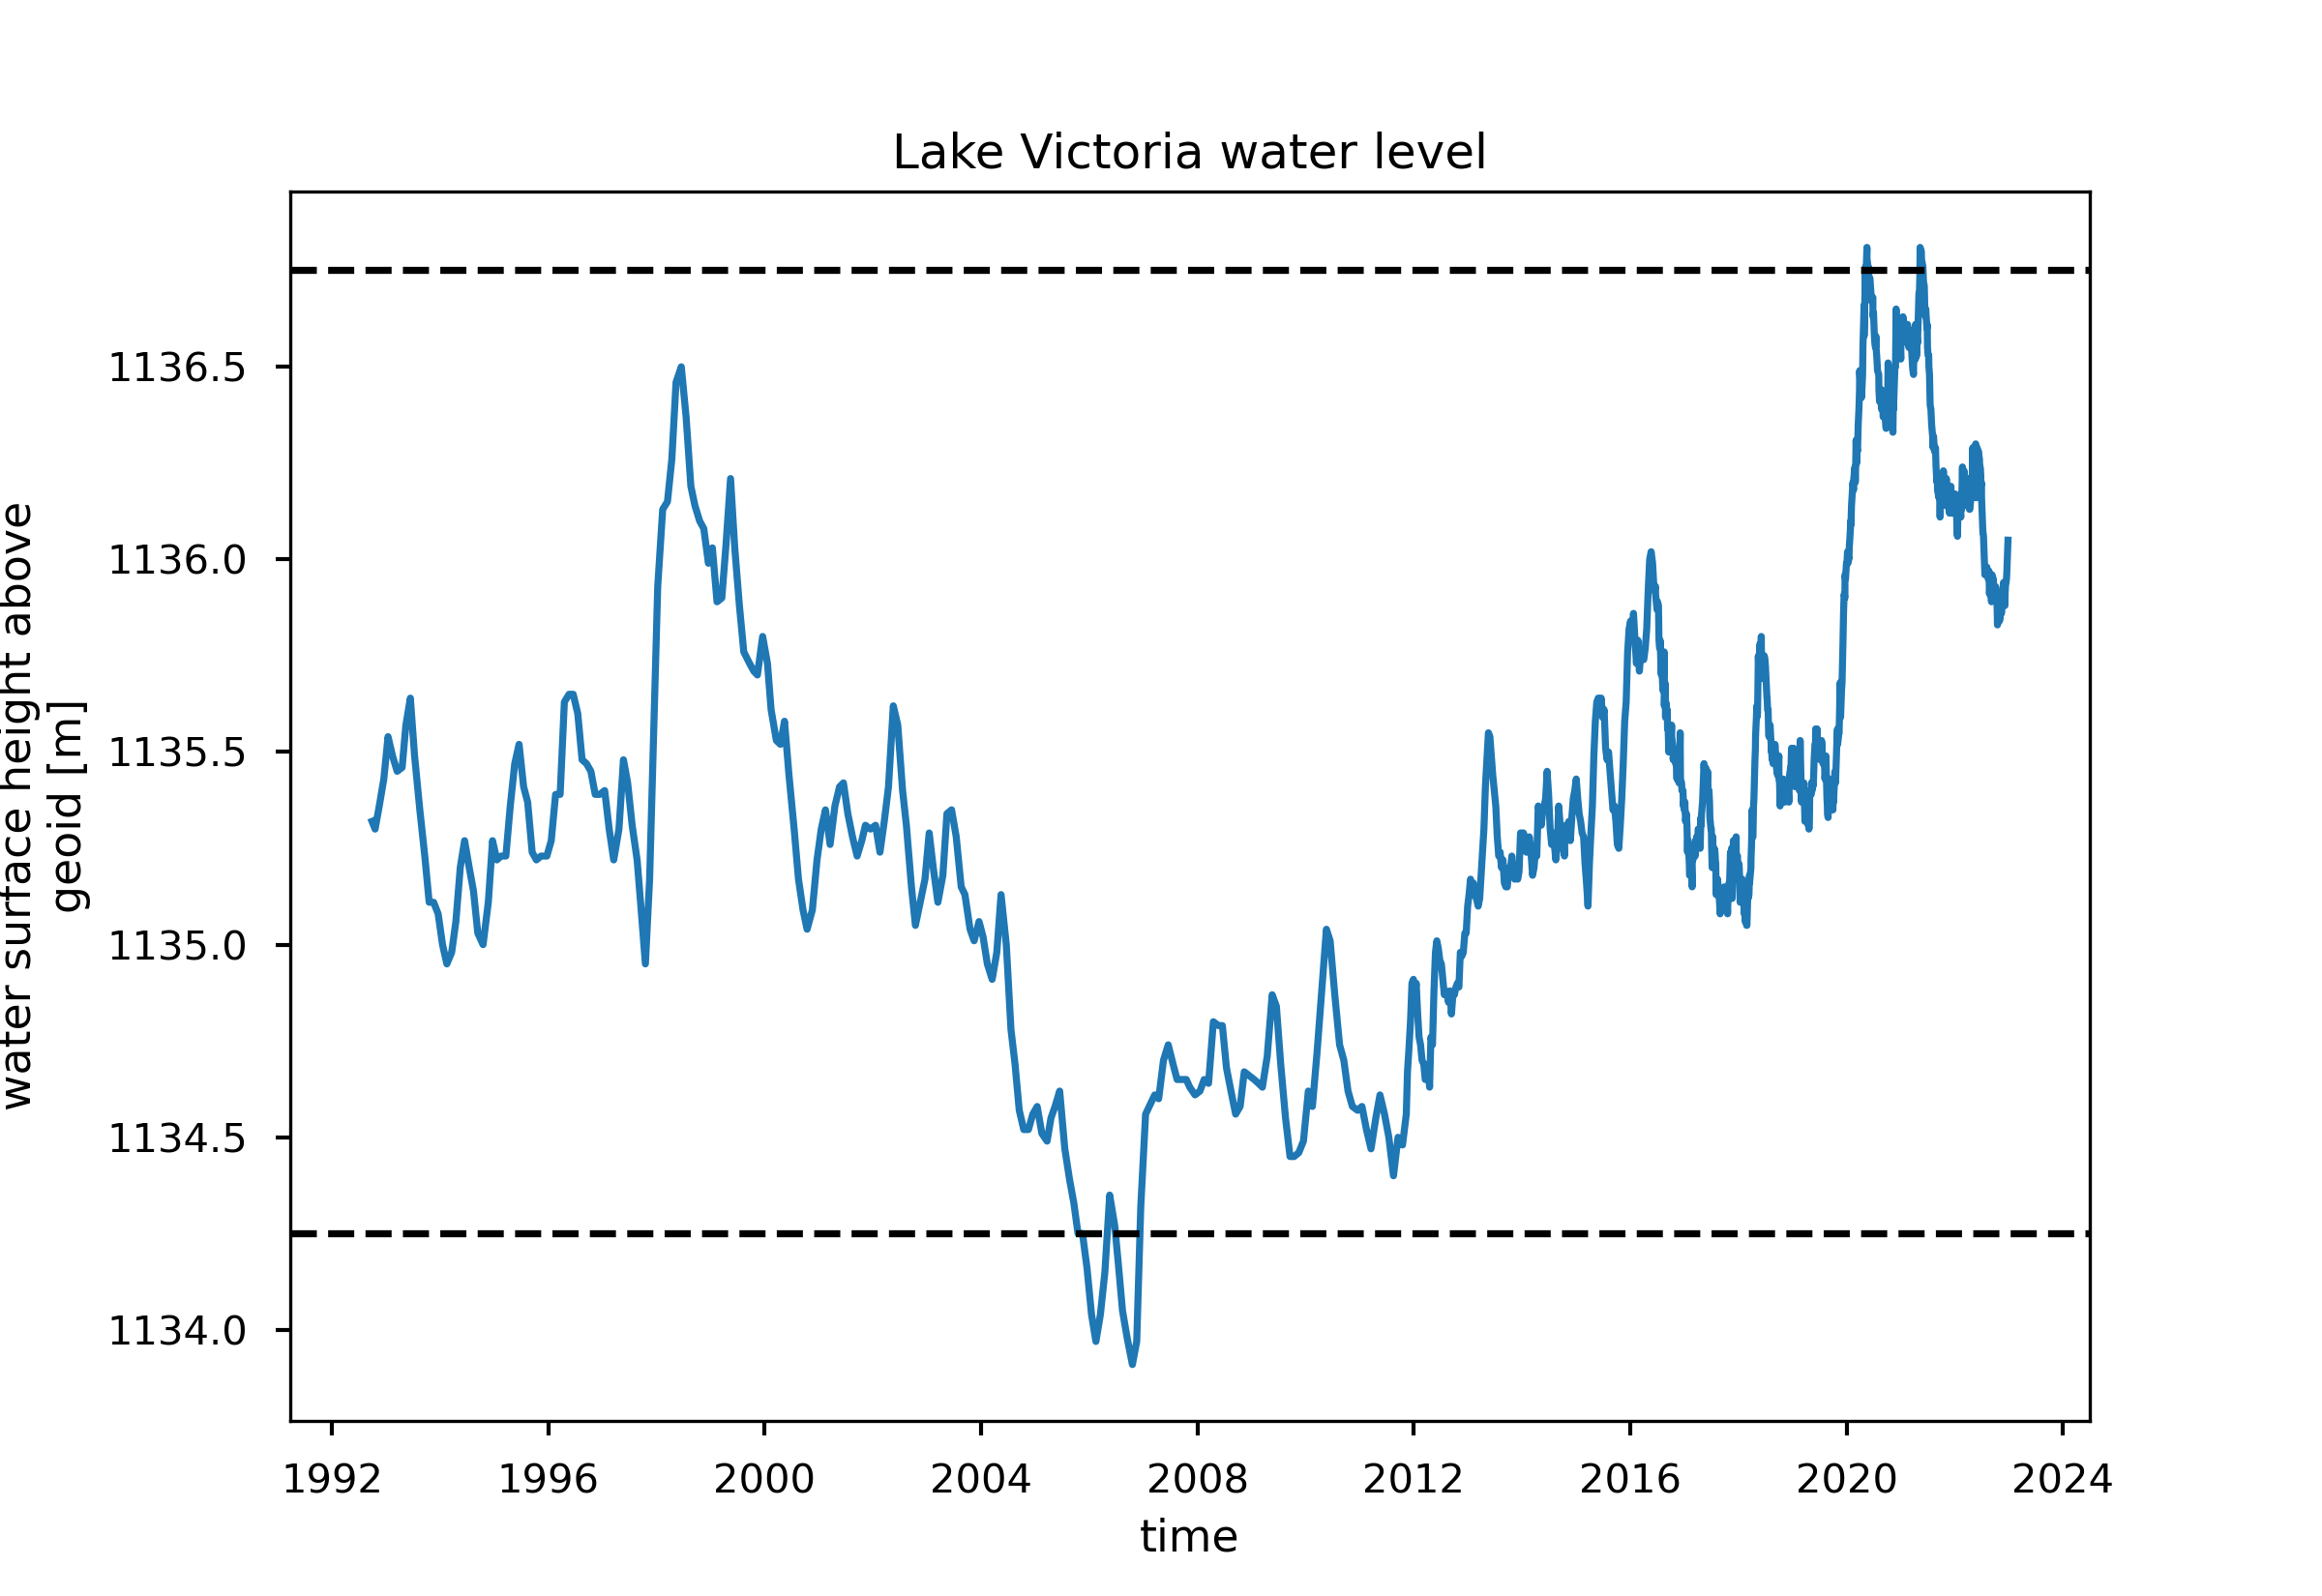

## 📋 Methodology

The analysis and results are organised in the following steps, which are detailed in the sections below:

**[](section-1)**
 * Download surface satellite lake water level for all the available period

**[](section-2)**
 * Extraction of 0.01 and 0.99 quantile
 * Plot time series with ablines of quantiles
 * Extraction water level values for the extracted quantile
 * Comparison with literature data


## 📈 Analysis and results

(section-1)=
### 1. Data request and download

#### Import packages
Import the packages to download the data using the c3s_eqc_automatic_quality_control library and the packages to clip the dataframe with shapefile to extract inland data (geopanda, shapely.geometry)


In [14]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from c3s_eqc_automatic_quality_control import download

warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-notebook")


#### Set the data request
Set the request for the specific lake (Victoria in our case) analyzed and the collection id (satellite lake water level).

In [15]:
collection_id = "satellite-lake-water-level"
request = {
    "variable": "all",
    "region": "southern_africa",
    "lake": "victoria",
    "version": "version_4_0",
    "format": "zip",
}
varname = "water_surface_height_above_reference_datum"

#### Download data

In [16]:
da = download.download_and_transform(collection_id, request)[varname].compute()

100%|██████████| 1/1 [00:00<00:00,  5.83it/s]


(section-2)=
### 2. Results

#### Compute quantiles and plot time series
Extraction of 0.01 and 0.99 quantile. Plot of time series with a line for each quantile. In this way extreme events can be identified.

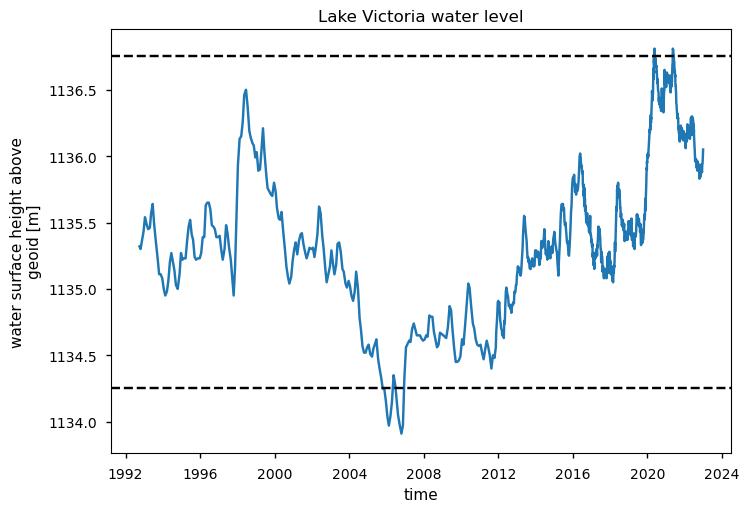

In [18]:
# Computing quantiles
da_qiles = da.quantile([0.01, 0.99])

# Plot time series
da.plot()
for qile in da_qiles:
    plt.axhline(qile, color="k", ls="--")
plt.title(f"Lake {request['lake'].title()} water level")

plt.savefig("Lake_water_level_plot.png", dpi=300)

#### Show extremes
Show the day and years for which a threshold exceedence happens.

In [10]:
name = f"{da.attrs['long_name'].title()} [{da.attrs['units']}]"
df99 = da.where(da > da_qiles.sel(quantile=0.99), drop=True).to_dataframe(name)
df01 = da.where(da < da_qiles.sel(quantile=0.01), drop=True).to_dataframe(name)
df99, df01

(                               quantile  Water Surface Height Above Geoid [m]
 time                                                                         
 2020-05-07 19:46:00.002517760      0.99                               1136.76
 2020-05-17 07:50:00.000572160      0.99                               1136.81
 2020-05-17 22:35:59.999656704      0.99                               1136.78
 2020-05-21 07:45:59.999942656      0.99                               1136.77
 2020-05-27 20:33:59.999771136      0.99                               1136.76
 2021-05-11 07:43:00.000114432      0.99                               1136.81
 2021-05-16 19:48:59.999771136      0.99                               1136.80
 2021-05-19 19:40:59.998512384      0.99                               1136.80
 2021-05-20 19:46:00.002517760      0.99                               1136.78
 2021-05-29 17:39:59.999427840      0.99                               1136.76
 2021-05-30 07:50:00.000572160      0.99            

#### Comparison with literature data
In the following plot, the evolution of water levels from 1998 to 2011, as reported by Bosuben et al. (2022) [[1]](https://doi.org/10.1080/02508060.2022.2128299), is shown.

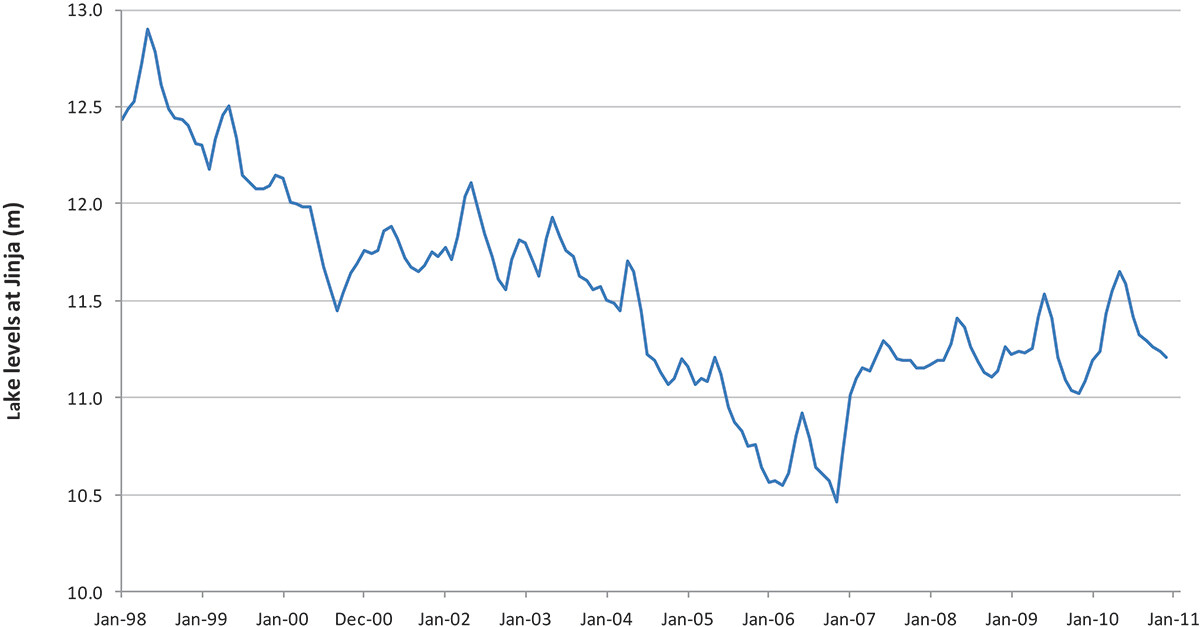

The satellite data effectively reproduce the declining trend from 1998 to 2006 as reported by Bosuben et al. (2022) [[1]](https://doi.org/10.1080/02508060.2022.2128299). As well as capture the extreme low water level in 2006 and the recent high water level event in 2020.

## ℹ️ If you want to know more

### Key resources

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [BOpen](https://www.bopen.eu/)

Dataset documentation:

* [ATBD](https://confluence.ecmwf.int/pages/viewpage.action?pageId=348800359), Algorithm Theoretical Basis Document
* [PQAR](https://confluence.ecmwf.int/pages/viewpage.action?pageId=348800377#LWLv4.0:ProductQualityAssessmentReport(PQAR)-Validatedproducts), Product Quality Assessment Report

### References

[[1]](https://doi.org/10.1080/02508060.2022.2128299) Kipyegon Bosuben, D., Wehn, U., & van der Zaag, P. (2022). Lake Victoria water levels declining (2000-2006): the role of absent and uncertain data in a transboundary water controversy. Water International, 48(8), 942–954. https://doi.org/10.1080/02508060.2022.2128299

[[2]](https://doi.org/10.1016/j.ejrh.2023.101347) Pavur, G., & Lakshmi, V. (2023). Observing the recent floods and drought in the Lake Victoria Basin using Earth observations and hydrological anomalies. Journal of Hydrology: Regional Studies, 46, 101347. 

[[3]](https://doi.org/10.3390/rs13214456) Deidda, C.; De Michele, C.; Arslan, A.N.; Pecora, S.; Taburet, N. Accuracy of Copernicus Altimeter Water Level Data in Italian Rivers Accounting for Narrow River Sections. Remote Sens. 2021, 13, 4456. 
